Cell Class: lays out the properties of a cell in any given state

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
class Cell:
    def __init__(self, cell_x, cell_y, seed = 0, vector_x = 0, vector_y = 0, cell_state = 0, cell_wall_length = 1, branch_probability = 0, cell_name = 'disconnected'):
        self.vector_x = vector_x
        self.vector_y = vector_y

        self.not_in_disconnected = 0 #identifies how many times this cell has had cell_task performed to it (if it is greater than 0 than the cell is connected)

        self.walls_removed = 0

        self.branch_probability = branch_probability

        self.if_seed = 0 #used to measure when or when not to add or remove a seed (helps with counting seeds) if there are no seed then some must be added

        self.seed = seed

        self.cell_wall_length = cell_wall_length

        self.cell_x = cell_x
        self.cell_y = cell_y

        self.cell_state = cell_state

        self.cell_name = cell_name

        self.connect_disconnect_choices = []

        self.cell_wall = np.array([1, 1, 1, 1])

        self.cell_neighborN = np.array([cell_x, cell_y+1]) #use numpy
        self.cell_neighborS = np.array([cell_x, cell_y-1])
        self.cell_neighborE = np.array([cell_x+1, cell_y])
        self.cell_neighborW = np.array([cell_x-1, cell_y])


    def cell_task(self, number_seeds, cell_north, cell_south, cell_west, cell_east):
        #part of class that dictates how the cells interact with one another // want only to have to call cell task between neighbors and have the actions be done


        if self.cell_state == 0: # if the self cell's vector and the other cell's vector are pointing in opposite directions then self cell gets an invitation ask if it should do this or if it should just be pointed to
            if ((cell_north.cell_x == self.cell_neighborN[0]) and (cell_north.cell_y == self.cell_neighborN[1])) and (cell_north.vector_x == 0 and cell_north.vector_y == -1) and cell_north.cell_state == 2:
                self.cell_state = 1
                self.not_in_disconnected += 1 #changes if the state has been taken out of disconnected state
                self.cell_wall[0] = 0 # these two lines of code indicate which walls to remove
                cell_north.cell_wall[1] = 0
                self.if_seed = 1
                self.walls_removed += 1

                return 1

            if ((cell_south.cell_x == self.cell_neighborS[0]) and (cell_south.cell_y == self.cell_neighborS[1])) and (cell_south.vector_x == 0 and cell_south.vector_y == 1 ) and cell_south.cell_state == 2:
                self.cell_state = 1
                self.not_in_disconnected += 1
                self.cell_wall[1] = 0
                cell_south.cell_wall[0] = 0
                self.if_seed = 1
                self.walls_removed += 1

                return 1

            if ((cell_east.cell_x == self.cell_neighborE[0]) and (cell_east.cell_y == self.cell_neighborE[1])) and (cell_east.vector_x == -1 and cell_east.vector_y == 0 ) and cell_east.cell_state == 2:
                self.cell_state = 1
                self.not_in_disconnected += 1
                self.cell_wall[3] = 0
                cell_east.cell_wall[2] = 0
                self.if_seed = 1
                self.walls_removed += 1

                return 1

            if ((cell_west.cell_x == self.cell_neighborW[0]) and (cell_west.cell_y == self.cell_neighborW[1])) and (cell_west.vector_x == 1 and cell_west.vector_y == 0 ) and cell_west.cell_state == 2:
                self.cell_state = 1
                self.not_in_disconnected += 1
                self.cell_wall[2] = 0
                cell_west.cell_wall[3] = 0
                self.if_seed = 1
                self.walls_removed += 1

                return 1


        if self.cell_state == 1: #extract north south east and west from
            if cell_north.cell_state == 0: #you will have to define north south east and west outside of the class using for loop (input for loop using this inputing all neighbors)
                self.connect_disconnect_choices.append(cell_north)

            if cell_south.cell_state == 0:
                self.connect_disconnect_choices.append(cell_south)

            if cell_west.cell_state == 0:
                self.connect_disconnect_choices.append(cell_west)

            if cell_east.cell_state == 0:
                self.connect_disconnect_choices.append(cell_east)

            if len(self.connect_disconnect_choices) <= 1:
                choice_invite = 0
            else:
                random.seed(self.seed + self.cell_x**2 + self.cell_y**2 + self.cell_y**5 - self.cell_x**3) # arbitrary function in an attempt to create predictable randomness
                choice_invite = random.randint(0, len(self.connect_disconnect_choices)-1)

            #creates vector in direction of choices

            if (len(self.connect_disconnect_choices) > 0) and (self.walls_removed < 4):

                if self.connect_disconnect_choices[choice_invite] == cell_north:
                    self.vector_x = 0
                    self.vector_y = 1
                    self.connect_disconnect_choices.remove(cell_north) #removes cells from
                    self.walls_removed += 1

                elif self.connect_disconnect_choices[choice_invite] == cell_south:
                    self.vector_x = 0
                    self.vector_y = -1
                    self.connect_disconnect_choices.remove(cell_south)
                    self.walls_removed += 1

                elif self.connect_disconnect_choices[choice_invite] == cell_west:
                    self.vector_x = -1
                    self.vector_y = 0
                    self.connect_disconnect_choices.remove(cell_west)
                    self.walls_removed += 1

                elif self.connect_disconnect_choices[choice_invite] == cell_east:
                    self.vector_x = 1
                    self.vector_y = 0
                    self.connect_disconnect_choices.remove(cell_east)
                    self.walls_removed += 1


            #changes cell state to 2
            self.cell_state = 2
            self.if_seed = -1 #seed must be removed after cell 1 task is complete

            return 0

        if self.cell_state == 2: #ignore invited neighbor
            random.seed((self.seed**self.cell_y)) #adding the cells coordinates corresponds to more randomness
            cell_state_number = random.randint(0, 100+1)

            if cell_state_number > self.branch_probability:#percentage likelyhood that a cell in state 2 will revert to a seed// the best branch probability is 5 percent
                #set branch probability to 20 to be computationally efficient
                self.cell_state = 3
                self.if_seed = 0
            else:
                self.cell_state = 1
                self.vector_x = 0
                self.vector_y = 0
                self.if_seed = 1 # seed state must be added back after it was removed in the cell 1 task

            return 0

        if self.cell_state == 3: ## if there is at least 1 live seed this cell does nothing
            if number_seeds == 0:
                random.seed((self.seed**self.cell_y))
                #percentage likelyhood that a cell in state 2 will revert to a seed// the best branch probability is 5 percent
                cell_state_number = random.randint(0, 100+1)

                for element in self.connect_disconnect_choices: # updates the available neighbors
                        if element.cell_state != 0:
                            self.connect_disconnect_choices.remove(element)

                if (cell_state_number > self.branch_probability) and (len(self.connect_disconnect_choices) == 0) and (self.walls_removed == 3): #if the branch probability permits a change into a seed and if the cell still has disconnected neighbors
                    #the bigger branch probability the more likely a cell is to turn back into a cell in state 1
                    self.cell_state = 3 #could remove but reminds me that cell_state must remain 3
                else:
                    self.cell_state = 1
                    self.vector_x = 0 #vector must be reset
                    self.vector_y = 0
                    self.if_seed = 1
            return 0

        return 0

    def cell_plot(self): #always do plt.show after this command has been done
        draw_cell(self.cell_x, self.cell_y, self.cell_wall_length, self.cell_wall[0], self.cell_wall[1], self.cell_wall[2], self.cell_wall[3])

    def __str__(self): #this was very useful for debugging
        return f'Cell({self.cell_x}, {self.cell_y}), State = {self.cell_state}'




Maze Class

In [2]:
import numpy as np
from tqdm import tqdm
import imageio as io
import matplotlib.axes as axes

class Maze: #YOU MUST INITIALIZE THE MAZE BEFORE DOING ANYTHING ELSE
    def __init__(self, width, height, seed, branch_probability):
        self.branch_probability = branch_probability
        self.height = height
        self.width = width
        self.seed = seed
        self.maze_matrix = []
        self.seed_x = 0
        self.seed_y = 0

    def initialize_maze(self): #this code takes the parameters outlined in self and uses double lists and the random class to create a seeded maze matrix

        for i in range(1, self.height + 1):
            row = []
            for j in range(1, self.width + 1):
                new_cell_object = Cell(j, i)
                new_cell_object.branch_probablity = self.branch_probability
                row.append(new_cell_object)
            self.maze_matrix.append(row)


        seed_2 = self.seed+1

        random.seed(self.seed)
        self.seed_x = random.randrange(0, self.width)
        random.seed(seed_2)
        self.seed_y = random.randrange(0, self.height)
        self.maze_matrix[self.seed_y][self.seed_x].cell_state = 1 #y direction goes first in double list
        print(f'seed: {self.maze_matrix[self.seed_y][self.seed_x]}') #displays the location of the seed

    def __str__(self): #this method prints out the state of every cell in the maze/maze matrix using numpy matrices
        maze_matrix_numpy = np.zeros((self.height, self.width), int)

        for element in self.maze_matrix:
            for term in element:
                maze_matrix_numpy[term.cell_y-1, term.cell_x-1] = term.cell_state

        return str(np.flipud(maze_matrix_numpy)) #it was necessary to flip the matrix because (1,1) was in the top left when it needed to be in the bottom left

    def create_maze(self): #put loading bar here
        null_cell = Cell((len(self.maze_matrix)+2),(len(self.maze_matrix[0])+2))
        null_cell.cell_state = 4 # 4 is an inert value thus it will not interact with any of the other values

        self.maze_matrix[self.seed_y][self.seed_x].vector_x = 0
        self.maze_matrix[self.seed_y][self.seed_x].vector_y = 0

        seeds = 1
        runs = 1

        total_runs = len(self.maze_matrix)*len(self.maze_matrix[0])

        progress_bar = tqdm(total = total_runs) #code necessary for creating a progress bar
        progress_bar.update(1)
        while runs < total_runs:
            for i in range(0, len(self.maze_matrix)):
                for j in range(0, len(self.maze_matrix[0])):

                    if (self.maze_matrix[i][j].cell_state == 3) and (len(self.maze_matrix[i][j].connect_disconnect_choices) == 0):
                        pass
                    else:
                        runs_seeds_list = create_maze_method_2(j, i, self.maze_matrix, null_cell, seeds)
                        seeds += runs_seeds_list[0]
                        runs += runs_seeds_list[1]

                        if runs_seeds_list[1] == 1:
                            progress_bar.update(1)

    def draw_maze(self): #draws each cell, fairly self explanatory

        fig, ax = plt.subplots()
        plt.title(f'Maze {self.width}x{self.height} seed:{self.seed}')
        plt.xlim(0, self.width+1)
        plt.ylim(0, self.height+1)
        ratio = (self.height)/(self.width)
        ax.set_aspect(aspect=ratio) #height is ratio times the width

        for element in self.maze_matrix:
            for term in element:
                term.cell_plot()

        plt.show

    def animate_maze(self): #animate maze is a very similar method to that of create_maze however, it saves each frame to a file which theoretically can be turned into a gif online...
        null_cell = Cell((len(self.maze_matrix)+2),(len(self.maze_matrix[0])+2))
        null_cell.cell_state = 4 # 4 is an inert value thus it will not interact with any of the other values

        self.maze_matrix[self.seed_y][self.seed_x].vector_x = 0
        self.maze_matrix[self.seed_y][self.seed_x].vector_y = 0

        seeds = 1
        runs = 1

        total_runs = len(self.maze_matrix)*len(self.maze_matrix[0])

        progress_bar = tqdm(total = total_runs) #code for displaying a progress bar, very necessary for this method as it can take a very very long time
        progress_bar.update(1)

        counter = 0


        while runs < total_runs:
            for i in range(0, len(self.maze_matrix)):
                for j in range(0, len(self.maze_matrix[0])):

                    if (self.maze_matrix[i][j].cell_state == 3) and (len(self.maze_matrix[i][j].connect_disconnect_choices) == 0):
                        pass
                    else:
                        runs_seeds_list = create_maze_method_2(j, i, self.maze_matrix, null_cell, seeds)
                        seeds += runs_seeds_list[0]
                        runs += runs_seeds_list[1]

                        if runs_seeds_list[1] == 1:
                            progress_bar.update(1)

            counter += 1

            fig, ax = plt.subplots()
            plt.title(f'Maze {self.width}x{self.height} seed:{self.seed}')
            plt.xlim(0, self.width+1)
            plt.ylim(0, self.height+1)
            ratio = (self.height)/(self.width)
            ax.set_aspect(aspect=ratio) #height is ratio times the width

            for element in self.maze_matrix: #this blurb of code saves frames into a file
                for term in element:
                    term.cell_plot()

            plt.savefig(f'/content/Plots/Maze_40X40/maze_{self.seed}_{counter}.png')
            plt.clf()



Create Maze Method Attempt 2: this is code that aids in executing development of the maze

In [3]:
def create_maze_method_2(cell_x, cell_y, maze_matrix, null_cell, seeds_total): #compensate for corners and cells on the side
#ADDITIONALLY: seeds_total must be fed into cell_task for cells in state 3 to only be able to change when there are no seeds
    seeds_added = 0
    runs = 0
    filled_cells = 0

    #these if statements account for the possibilities that a cell may be in a corner, or on a cusp
    #in such cases the cell task will be executed using the null cell in place of their non-existant neighbors. The null cell has the property of never changing or inluencing other cells

    if ((maze_matrix[cell_y][cell_x].cell_y + 1) > len(maze_matrix)) and (maze_matrix[cell_y][cell_x].cell_x + 1) > len(maze_matrix[0]): #north east corner
        runs = Cell.cell_task(maze_matrix[cell_y][cell_x], seeds_total, null_cell, maze_matrix[cell_y-1][cell_x], maze_matrix[cell_y][cell_x-1], null_cell)

        # this area was likely the most complicated part of the coding process, as knowing how many seeds are in existence at any given time requires passing variable data through many levels of code
        # runs was also a difficult process, runs counts how many cells are connected, this requires passing variable data through essentially all levels of my code

        seeds_added += maze_matrix[cell_y][cell_x].if_seed



    elif ((maze_matrix[cell_y][cell_x].cell_y - 1) == 0) and ((maze_matrix[cell_y][cell_x].cell_y - 1) == 0): #south east corner
        runs = Cell.cell_task(maze_matrix[cell_y][cell_x], seeds_total, maze_matrix[cell_y+1][cell_x], null_cell, maze_matrix[cell_y][cell_x-1], null_cell)

        seeds_added += maze_matrix[cell_y][cell_x].if_seed



    elif ((maze_matrix[cell_y][cell_x].cell_y + 1) > len(maze_matrix)) and ((maze_matrix[cell_y][cell_x].cell_x - 1) == 0): #north west corner
        runs = Cell.cell_task(maze_matrix[cell_y][cell_x], seeds_total, null_cell, maze_matrix[cell_y-1][cell_x], null_cell, maze_matrix[cell_y][cell_x+1])

        seeds_added += maze_matrix[cell_y][cell_x].if_seed



    elif ((maze_matrix[cell_y][cell_x].cell_y - 1) == 0) and ((maze_matrix[cell_y][cell_x].cell_x - 1) == 0): #south west corner
        runs = Cell.cell_task(maze_matrix[cell_y][cell_x], seeds_total, maze_matrix[cell_y+1][cell_x], null_cell, null_cell, maze_matrix[cell_y][cell_x+1])

        seeds_added += maze_matrix[cell_y][cell_x].if_seed



    elif (maze_matrix[cell_y][cell_x].cell_y + 1) > len(maze_matrix): #cant go north
        runs = Cell.cell_task(maze_matrix[cell_y][cell_x], seeds_total, null_cell, maze_matrix[cell_y-1][cell_x], maze_matrix[cell_y][cell_x-1], maze_matrix[cell_y][cell_x+1])

        seeds_added += maze_matrix[cell_y][cell_x].if_seed



    elif (maze_matrix[cell_y][cell_x].cell_x + 1) > len(maze_matrix[0]): #cant go east
        runs = Cell.cell_task(maze_matrix[cell_y][cell_x], seeds_total, maze_matrix[cell_y+1][cell_x], maze_matrix[cell_y-1][cell_x], maze_matrix[cell_y][cell_x-1], null_cell)

        seeds_added += maze_matrix[cell_y][cell_x].if_seed



    elif (maze_matrix[cell_y][cell_x].cell_y - 1) == 0: #cant go south
        runs = Cell.cell_task(maze_matrix[cell_y][cell_x], seeds_total, maze_matrix[cell_y+1][cell_x], null_cell, maze_matrix[cell_y][cell_x-1], maze_matrix[cell_y][cell_x+1])

        seeds_added += maze_matrix[cell_y][cell_x].if_seed



    elif (maze_matrix[cell_y][cell_x].cell_x - 1) == 0: #cant go west
        runs = Cell.cell_task(maze_matrix[cell_y][cell_x], seeds_total, maze_matrix[cell_y+1][cell_x], maze_matrix[cell_y-1][cell_x], null_cell, maze_matrix[cell_y][cell_x+1])

        seeds_added += maze_matrix[cell_y][cell_x].if_seed



    else:
        runs = Cell.cell_task(maze_matrix[cell_y][cell_x], seeds_total, maze_matrix[cell_y+1][cell_x], maze_matrix[cell_y-1][cell_x], maze_matrix[cell_y][cell_x-1], maze_matrix[cell_y][cell_x+1])

        seeds_added += maze_matrix[cell_y][cell_x].if_seed



    return [seeds_added, runs] #returns a list of how many seeds were added/removed and how many new connected cells were added




Draw Cell Method: this method plots the walls of the cells

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def draw_cell(cell_x, cell_y, cell_wall_length, wall_t = 1, wall_b = 1, wall_l = 1, wall_r = 1): # defined by the center of the cube
    bottom_left_x = cell_x - cell_wall_length/2
    bottom_left_y = cell_y - cell_wall_length/2

    bottom_right_x = cell_x + cell_wall_length/2
    bottom_right_y = cell_y - cell_wall_length/2

    top_left_x = cell_x - cell_wall_length/2
    top_left_y = cell_y + cell_wall_length/2

    top_right_x = cell_x + cell_wall_length/2
    top_right_y = cell_y + cell_wall_length/2

    cell_wall_list = np.array([wall_t, wall_b, wall_l, wall_r])

    if wall_t == 1:
        plt.plot([top_left_x, top_right_x], [top_left_y, top_right_y], color = 'black') #top line

    if wall_b == 1:
        plt.plot([bottom_left_x, bottom_right_x], [bottom_left_y, bottom_right_y], color = 'black') #bottom line

    if wall_l == 1:
        plt.plot([bottom_left_x, top_left_x], [bottom_left_y, top_left_y], color = 'black') #left line

    if wall_r == 1:
        plt.plot([bottom_right_x, top_right_x], [bottom_right_y, top_right_y], color = 'black') #right line




Initializing a maze using the maze class

seed: Cell(35, 1), State = 1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


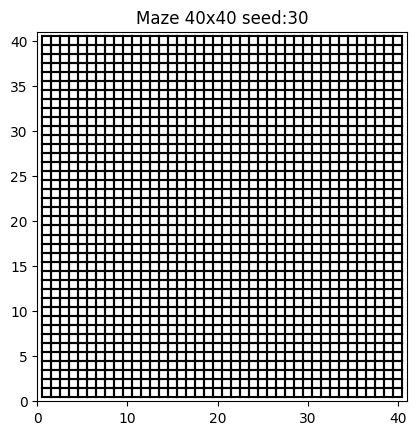

In [5]:
test_maze = Maze(40, 40, 30, 80) #creation of maze object order: Maze(width, height, seed, branch_probability) If all of these are the same, the code will produce the same maze each time

# what is branch probability? it is the percentage likelihood that a cell in state 3 or state 2 will turn back into a seed

#for cells in state 3 they will only be subject to branch probablility when there are no seeds
#for cells in state 2 this is a possibility any time they are in that state (this likely accounts for biforcations in seed activity)

test_maze.initialize_maze() #initialization of maze, displays location of the seed
print(test_maze) # demonstrates how the maze can be represented as a string
test_maze.draw_maze() # draws the maze

Create Maze: this is a class method that creates a novel maze

100%|██████████| 1600/1600 [00:07<00:00, 219.14it/s]


[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]


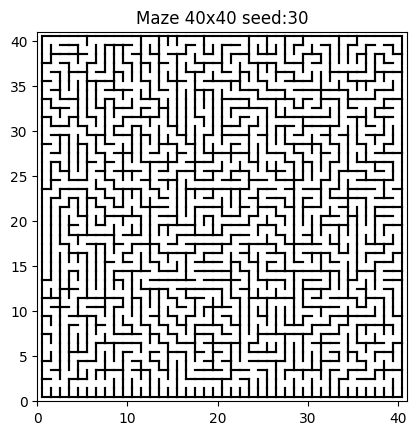

In [6]:
test_maze.create_maze() # you will notice spikes at the bottom, I was unable to fix this problem while coding, possibly a randomness error
print(test_maze)
test_maze.draw_maze()

Set up for creating a gif

seed: Cell(25, 4), State = 1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


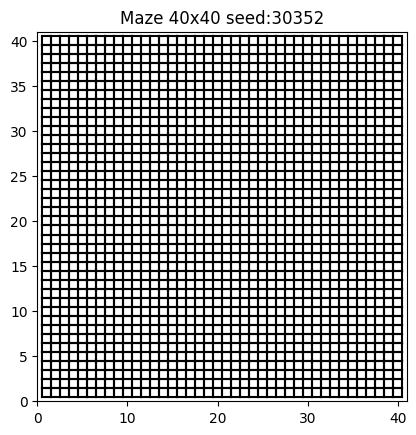

In [ ]:
test_maze_2 = Maze(30, 40, 30352, 80) #large maze
test_maze_2.initialize_maze()
print(test_maze_2)
test_maze_2.draw_maze()

Putting Frames into a file

In [ ]:
test_maze_2.animate_maze() # loads frames of each maze step into a file (requires alteration to the code to switch the file the images are sent to)
print(test_maze_2) # if the maze is large it will take a incredibly long time to do this (about 2 hours for a 40x40)

100%|██████████| 1600/1600 [2:02:14<00:00,  4.58s/it]

[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]


<Figure size 640x480 with 0 Axes>

Downloading file with frames for processing

In [ ]:
!zip -r /content/Plots/Maze_40X40.zip /content/Plots/Maze_40X40/

  adding: content/Plots/Maze_40X40/ (stored 0%)
  adding: content/Plots/Maze_40X40/maze_30352_648.png (deflated 11%)
  adding: content/Plots/Maze_40X40/maze_30352_476.png (deflated 13%)
  adding: content/Plots/Maze_40X40/maze_30352_537.png (deflated 13%)
  adding: content/Plots/Maze_40X40/maze_30352_965.png (deflated 11%)
  adding: content/Plots/Maze_40X40/maze_30352_1414.png (deflated 12%)
  adding: content/Plots/Maze_40X40/maze_30352_130.png (deflated 19%)
  adding: content/Plots/Maze_40X40/maze_30352_1254.png (deflated 11%)
  adding: content/Plots/Maze_40X40/maze_30352_1423.png (deflated 12%)
  adding: content/Plots/Maze_40X40/maze_30352_1174.png (deflated 11%)
  adding: content/Plots/Maze_40X40/maze_30352_1621.png (deflated 11%)
  adding: content/Plots/Maze_40X40/maze_30352_524.png (deflated 13%)
  adding: content/Plots/Maze_40X40/maze_30352_488.png (deflated 13%)
  adding: content/Plots/Maze_40X40/maze_30352_1107.png (deflated 12%)
  adding: content/Plots/Maze_40X40/maze_30352_356

438 lines of code